In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.tsa.stattools as ts
import numpy as np

from statsmodels.formula.api import ols
from patsy import dmatrices
from scipy.stats import f, chi2, norm

%matplotlib inline

import seaborn as sns
sns.set(color_codes=True)

# MOOC Econometrics
## Case Project – House Prices

### Background

This project is of an applied nature and uses data that are available in the data file `Capstone-HousePrices`. The
source of these data is Anglin and Gencay, "Semiparametric Estimation of a Hedonic Price Function" (Journal of
Applied Econometrics 11, 1996, pages 633-648). 

We consider the modeling and prediction of house prices. 

Data are available for 546 observations of the following variables:

- `sell`: Sale price of the house
- `lot`: Lot size of the property in square feet
- `bdms`: Number of bedrooms
- `fb`: Number of full bathrooms
- `sty`: Number of stores excluding basement
- `drv`: Dummy that is 1 if the house has a driveway and 0 otherwise
- `rec`: Dummy that is 1 if the house has a recreational room and 0 otherwise
- `ffin`: Dummy that is 1 if the house has a full finished basement and 0 otherwise
- `ghw`: Dummy that is 1 if the house uses gas for hot water heating and 0 otherwise
- `ca`: Dummy that is 1 if there is central air conditioning and 0 otherwise
- `gar`: Number of covered garage places
- `reg`: Dummy that is 1 if the house is located in a preferred neighborhood of the city and 0 otherwise
- `obs`: Observation number, needed in part **(h)**

In [2]:
houses = pd.read_csv('Housing-Prices.txt', sep='\t')
houses.head()

,obs,sell,lot,bdms,fb,sty,drv,rec,ffin,ghw,ca,gar,reg
0,1,42000,5850,3,1,2,1,0,1,0,0,1,0
1,2,38500,4000,2,1,1,1,0,0,0,0,0,0
2,3,49500,3060,3,1,1,1,0,0,0,0,0,0
3,4,60500,6650,3,1,2,1,1,0,0,0,0,0
4,5,61000,6360,2,1,1,1,0,0,0,0,0,0


### Questions

**(a)** Consider a linear model where the sale price of a house is the dependent variable and the explanatory variables
are the other variables given above. Perform a test for linearity. What do you conclude based on the test
result?

I will include all variables except for `obs` - it does not make sense to include it. 

In [3]:
full_model = ols('sell ~ '
                     'lot + bdms + fb + sty + drv + ' + 
                     'rec + ffin + ghw + ca + gar + reg', 
                 data=houses).fit()
full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   sell   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     99.97
Date:                Sat, 28 Nov 2015   Prob (F-statistic):          6.18e-122
Time:                        20:46:36   Log-Likelihood:                -6034.1
No. Observations:                 546   AIC:                         1.209e+04
Df Residuals:                     534   BIC:                         1.214e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept  -4038.3504   3409.471     -1.184      0.237     -1.07e+04  2659.271
lot            3.5463      0.350     10.124      0.000         2.858     4.234
bdms        1832.0035   1047.000      1.750      0.081      -224.741  3888.748
fb          1.434e+04   1489.921      9.622      0.000      1.14e+04  1.73e+04
sty         6556.9457    925.290      7.086      0.000      4739.291  8374.600
drv         6687.7789   2045.246      3.270      0.001      2670.065  1.07e+04
rec         4511.2838   1899.958      2.374      0.018       778.976  8243.592
ffin        5452.3855   1588.024      3.433      0.001      2332.845  8571.926
ghw         1.283e+04   3217.597      3.988      0.000      6510.706  1.92e+04
ca          1.263e+04   1555.021      8.124      0.000      9578.182  1.57e+04
gar         4244.8290    840.544      5.050      0.000      2593.650  5896.008
reg         9369.5132   1669.091      5.614      0.000      6090.724  1.26e+04
==============================================================================
Omnibus:                       93.454   Durbin-Watson:                   1.604
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              247.620
Skew:                           0.853   Prob(JB):                     1.70e-54
Kurtosis:                       5.824   Cond. No.                     3.07e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.07e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Almost all variables, except for `bdms`, are significant at 5% level (`bdms` is significant at 10% level) 

$p$-value for the Jarque-Bera test says that we cannot reject the hypothesis that residuals are distributed normally.

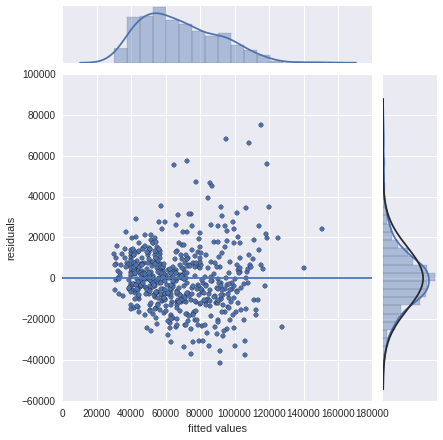

In [26]:
fitted = full_model.predict()
resid = full_model.resid

g = sns.JointGrid(x=fitted, y=resid)
g.set_axis_labels(xlabel='fitted values', ylabel='residuals')

ax_joint = g.ax_joint
ax_joint.scatter(fitted, resid)
ax_joint.axhline(0)

sns.distplot(fitted, ax=g.ax_marg_x)
sns.distplot(resid, ax=g.ax_marg_y, fit=norm, vertical=True)

plt.show()

Even though the distributed of residuals looks normal (and JB test doesn't reject normality), it looks like the left tail of the distriburion is longer. So we need to try transforming the price variable.

**(b)** Now consider a linear model where the log of the sale price of the house is the dependent variable and the
explanatory variables are as before. Perform again the test for linearity. What do you conclude now?


In [5]:
from numpy import log

In [6]:
full_model_log = ols('log(sell) ~ '
                         'lot + bdms + fb + sty + drv + ' +
                         'rec + ffin + ghw + ca + gar + reg', 
                     data=houses).fit()
full_model_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log(sell)   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     101.6
Date:                Sat, 28 Nov 2015   Prob (F-statistic):          3.67e-123
Time:                        20:46:37   Log-Likelihood:                 73.873
No. Observations:                 546   AIC:                            -123.7
Df Residuals:                     534   BIC:                            -72.11
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     10.0256      0.047    212.210      0.000         9.933    10.118
lot         5.057e-05   4.85e-06     10.418      0.000       4.1e-05  6.01e-05
bdms           0.0340      0.015      2.345      0.019         0.006     0.063
fb             0.1678      0.021      8.126      0.000         0.127     0.208
sty            0.0923      0.013      7.197      0.000         0.067     0.117
drv            0.1307      0.028      4.610      0.000         0.075     0.186
rec            0.0735      0.026      2.792      0.005         0.022     0.125
ffin           0.0994      0.022      4.517      0.000         0.056     0.143
ghw            0.1784      0.045      4.000      0.000         0.091     0.266
ca             0.1780      0.022      8.262      0.000         0.136     0.220
gar            0.0508      0.012      4.358      0.000         0.028     0.074
reg            0.1271      0.023      5.496      0.000         0.082     0.173
==============================================================================
Omnibus:                        7.621   Durbin-Watson:                   1.510
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                8.443
Skew:                          -0.199   Prob(JB):                       0.0147
Kurtosis:                       3.461   Cond. No.                     3.07e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.07e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

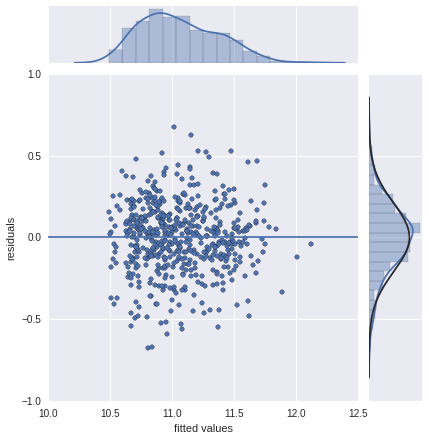

In [7]:
fitted = full_model_log.predict()
resid = full_model_log.resid

g = sns.JointGrid(x=fitted, y=resid)
g.set_axis_labels(xlabel='fitted values', ylabel='residuals')

ax_joint = g.ax_joint
ax_joint.scatter(fitted, resid)
ax_joint.axhline(0)

sns.distplot(fitted, ax=g.ax_marg_x)
sns.distplot(resid, ax=g.ax_marg_y, fit=norm, vertical=True)

plt.show()

Even though $p$-value for JB is smaller than for **(a)**, the plot suggests that the log transformation is better: the distribution of residuals doesn't have the long tail, and follows the fitted normal distribution closer than in **(a)**

**(c)** Continue with the linear model from question **(b)**. 

- We now consider possible transformation of the lot size variable. 
- We can consider either the variable itself, or a log transformation of this variable. 
- Which of these do you prefer? (Keep all other explanatory variables included without transformation.)

First, let's have a look at the distribution of this variable:

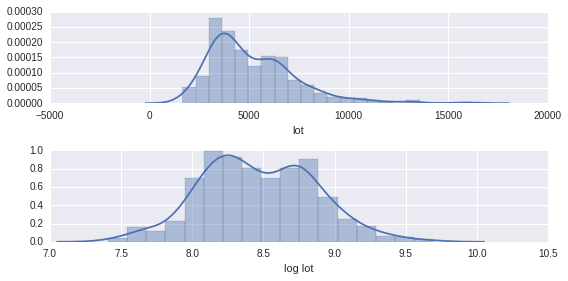

In [8]:
plt.figure(figsize=(8, 4))

ax1 = plt.subplot(2, 1, 1)
sns.distplot(houses.lot, ax=ax1, axlabel='lot')

ax2 = plt.subplot(2, 1, 2)
sns.distplot(np.log(houses.lot), ax=ax2, axlabel='log lot')

plt.tight_layout()
plt.show()

The log transfrom seems to give a better (more "balanced") spread. Let us try fitting 2 OLS models, one with transformation, another without.

In [9]:
model_2a = ols('log(sell) ~ '
                   'lot + bdms + fb + sty + drv + ' +
                   'rec + ffin + ghw + ca + gar + reg', 
               data=houses).fit()
model_2b = ols('log(sell) ~ '
                   'log(lot) + bdms + fb + sty + drv + ' +
                   'rec + ffin + ghw + ca + gar + reg', 
               data=houses).fit()

print 'R2_a = %0.4f, AIC = %0.4f, BIC = %0.4f' % \
        (model_2a.rsquared, model_2a.aic, model_2a.bic)
print 'R2_b = %0.4f, AIC = %0.4f, BIC = %0.4f' % \
        (model_2b.rsquared, model_2b.aic, model_2b.bic)

R2_a = 0.6766, AIC = -123.7462, BIC = -72.1148
R2_b = 0.6865, AIC = -140.8234, BIC = -89.1919


The model **2b** has higher (better) $R^2$ and lower (better) AIC and BIC. So the model **2b** with log transformation of `lot` is better than **2a** without the transformation.

**(d)** 

- We now consider
interaction effects of the log lot size with the other variables. 
- Construct these interaction variables. 
- How many are individually significant?

In [10]:
def summary(model):
    return pd.DataFrame(
             {'coef': model.params.round(4), 
              '$t$-value': model.tvalues.round(4),
              'SE': model.bse.round(4),
              '$p$-value': model.pvalues.round(4),
              'significance': np.where(model.pvalues <= 0.05, 'significant', 'not')},
             columns=['coef', 'SE', '$t$-value', '$p$-value', 'significance'])

To construct the interaction variables, we consider additional variables that look like $\log \text{lot} \times x_j$ where $x_j$ is other variables, not $\log \text{lot}$

In [11]:
model_d = ols('log(sell) ~ '
                 'log(lot) + bdms + fb + sty + drv + ' +
                 'rec + ffin + ghw + ca + gar + reg + ' + 
                 'log(lot):bdms + log(lot):fb + log(lot):sty + ' + 
                 'log(lot):drv + log(lot):rec + log(lot):ffin + ' + 
                 'log(lot):ghw + log(lot):ca + log(lot):gar + ' + 
                 'log(lot):reg', data=houses).fit()  
summary(model_d)

,coef,SE,$t$-value,$p$-value,significance
Intercept,8.9665,1.0707,8.3747,0.0000,significant
log(lot),0.1527,0.1283,1.1901,0.2345,not
bdms,0.0191,0.3267,0.0584,0.9535,not
fb,-0.3682,0.4290,-0.8583,0.3911,not
sty,0.4889,0.3097,1.5786,0.1150,not
drv,-1.4634,0.7172,-2.0403,0.0418,significant
rec,1.6740,0.6559,2.5521,0.0110,significant
ffin,-0.0318,0.4455,-0.0715,0.9430,not
ghw,-0.5059,0.9027,-0.5604,0.5754,not
ca,-0.3403,0.4960,-0.6860,0.4930,not


Now there are only 5 variables that are individually significant at 5% level:

In [12]:
model_d.pvalues[model_d.pvalues <= 0.05].round(4)

Intercept       0.0000
drv             0.0418
rec             0.0110
log(lot):drv    0.0288
log(lot):rec    0.0139
dtype: float64

**(e)** Perform an F-test for the joint significance of the interaction effects from question **(d)**.

In [13]:
model_d.f_test('log(lot):bdms = log(lot):fb = log(lot):sty = ' + 
               'log(lot):drv = log(lot):rec = log(lot):ffin = ' + 
               'log(lot):ghw = log(lot):ca = log(lot):gar = ' + 
               'log(lot):reg = 0')

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=array([[ 1.47119505]]), p=0.146562197419, df_denom=524, df_num=10>

The interaction terms are **not** jointly significant at 5% level.

**(f)** Now perform model specification on the interaction variables using the general-to-specific approach. (Only
eliminate the interaction effects.)

In [14]:
y, X = dmatrices('log(sell) ~ '
                     'log(lot) + bdms + fb + sty + drv + ' +
                     'rec + ffin + ghw + ca + gar + reg + ' + 
                     'log(lot):bdms + log(lot):fb + log(lot):sty + ' + 
                     'log(lot):drv + log(lot):rec + log(lot):ffin + ' + 
                     'log(lot):ghw + log(lot):ca + log(lot):gar + ' + 
                     'log(lot):reg', data=houses, return_type='dataframe')

In [15]:
def backwards_elimination(y, X):
    interactions = set(X.columns[12:])
    step = 1

    while interactions:
        print 'step #%d...' % step
        model = sm.OLS(y, X).fit()
        least_signigicant = model.pvalues[12:].argmax()
        p_value = model.pvalues[least_signigicant]
        
        if p_value <= 0.05:
            print 'all remaining variables are significant'
            print 'remaining interaction terms: %s' % ', '.join(interactions)
            print 'the final model is %s ~ %s' % (y.columns[0], ' + '.join(X.columns))

        print 'variable %s is least significant (p-value = %0.4f), removing it' % (least_signigicant, p_value)
        del X[least_signigicant]
        interactions.remove(least_signigicant)
        step = step + 1
    return model

In [16]:
model_f = backwards_elimination(y, X)

step #1...
variable log(lot):reg is least significant (p-value = 0.9784), removing it
step #2...
variable log(lot):bdms is least significant (p-value = 0.9582), removing it
step #3...
variable log(lot):ffin is least significant (p-value = 0.7434), removing it
step #4...
variable log(lot):ghw is least significant (p-value = 0.4370), removing it
step #5...
variable log(lot):ca is least significant (p-value = 0.3017), removing it
step #6...
variable log(lot):gar is least significant (p-value = 0.2448), removing it
step #7...
variable log(lot):fb is least significant (p-value = 0.1872), removing it
step #8...
variable log(lot):sty is least significant (p-value = 0.2906), removing it
step #9...
variable log(lot):drv is least significant (p-value = 0.0502), removing it
step #10...
all remaining variables are significant
remaining interaction terms: log(lot):rec
the final model is log(sell) ~ Intercept + log(lot) + bdms + fb + sty + drv + rec + ffin + ghw + ca + gar + reg + log(lot):rec
varia

So only one interaction term is significant - and it's the interaction with `rec`

In [17]:
summary(model_f)

,coef,SE,$t$-value,$p$-value,significance
Intercept,7.5907,0.2266,33.5046,0.0000,significant
log(lot),0.3202,0.0277,11.5619,0.0000,significant
bdms,0.0384,0.0143,2.6797,0.0076,significant
fb,0.1632,0.0203,8.0431,0.0000,significant
sty,0.0908,0.0126,7.2203,0.0000,significant
drv,0.1131,0.0282,4.0177,0.0001,significant
rec,1.4431,0.6265,2.3036,0.0216,significant
ffin,0.1045,0.0216,4.8350,0.0000,significant
ghw,0.1843,0.0438,4.2076,0.0000,significant
ca,0.1659,0.0213,7.8041,0.0000,significant


**(g)**

One may argue that some of the explanatory variables are endogenous and that there may be omitted variables.

For example, the ‘condition’ of the house in terms of how it is maintained is not a variable (and difficult to
measure) but will affect the house price. 
It will also affect, or be reflected in, some of the other variables, such
as whether the house has an air conditioning (which is mostly in newer houses).

If the condition of the house
is missing, will the effect of air conditioning on the (log of the) sale price be over- or underestimated? 

(For this question no computer calculations are required.)

- good condition will typically increase chances of having AC
- good condition will also increase the price

So if AC is endogenous because of missing `condition`, it will cause over-estimation of the effect of AC 

**(h)**

Finally we analyze the predictive ability of the model. 

Consider again the model where

- the log of the sale price of the house is the dependent variable and
- the explanatory variables are the log transformation of lot size, with all other explanatory variables in their original form (and no interaction effects). 

Do:

- Estimate the parameters of the model using the first 400 observations. 
- Make predictions on the log of the price and calculate the MAE for the other 146 observations. 


How good is the predictive power of the model (relative to the variability in the log of the price)?

In [18]:
train = houses.obs <= 400
test = ~train

print 'sizes: training set = %d, testing set = %d' % (sum(train), sum(test))

sizes: training set = 400, testing set = 146


In [19]:
model_h = ols('log(sell) ~ '
                   'lot + bdms + fb + sty + drv + ' +
                   'rec + ffin + ghw + ca + gar + reg', 
              data=houses[train]).fit()

predicted = model_h.predict(houses[test])
actual = np.log(houses[test].sell)

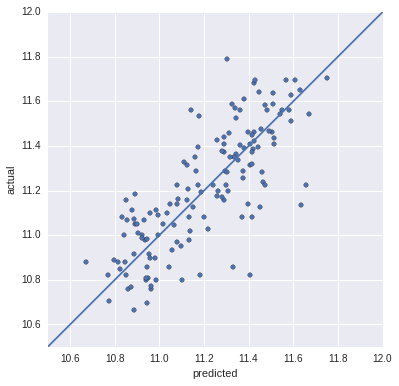

In [20]:
plt.figure(figsize=(6, 6))

plt.scatter(predicted, actual)
plt.plot([0, 12], [0, 12])

plt.xlabel('predicted')
plt.xlim([10.5, 12])

plt.ylabel('actual')
plt.ylim([10.5, 12])

plt.show()

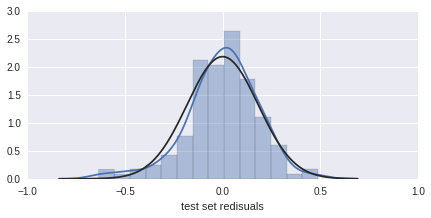

In [21]:
plt.figure(figsize=(7, 3))
sns.distplot(actual - predicted, fit=norm, axlabel='test set redisuals')
plt.xlim([-1, 1])
plt.show()

In [22]:
sm.OLS(actual, predicted).fit().rsquared

0.99973576194198166

The model does pretty well: predicted and actual values are almost on the same line ($R^2 = 0.99$)

In [23]:
def mae(real, predicted):
    return np.abs(real - predicted).mean()

In [24]:
mae(actual, predicted)

0.13735361395857656

Mean absolute error is 0.14

Let's also see what is MAE in the usual domain, not in the log

In [25]:
mae(houses[test].sell, np.exp(predicted))

10367.409234357474